In [1]:
import os, pickle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from constants import get_objects_labels

In [2]:
def print_discretized_data(data, x_values, y_values, robot, modality, behavior, object_name, save_plot=False):
    """
    prints the data point and save it

    :param data: one data point
    :param x_values: temporal bins
    :param y_values:
    :param modality:
    :param behavior:
    :param file_path:

    :return:
    """
    
    data = data.reshape(x_values, y_values)

    title = robot+"-"+behavior.capitalize()+"-"+modality.capitalize()+" Features\n(" + object_name + ")"
    plt.title(title, fontsize=16)
    plt.xlabel("Temporal Bins", fontsize=16)

    if modality in ['effort']:
        im = plt.imshow(data.T, cmap="GnBu")
        y_label = "Joints"
    elif modality in ['force']:
        im = plt.imshow(data.T, cmap="GnBu")
        y_label = "Axis"
    elif modality == 'audio':
        im = plt.imshow(np.flipud(data.T), cmap="GnBu")
        y_label = "Frequency Bins"
    else:
        y_label = ""
    plt.ylabel(y_label, fontsize=16)

    ax = plt.gca()
    ax.set_xticks(np.arange(0, x_values, 1))
    ax.set_xticklabels(np.arange(1, x_values + 1, 1))
    if modality in ['force']:
        axis = ['x', 'y', 'z']
        ax.set_yticks(np.arange(0, len(axis), 1))
        ax.set_yticklabels(axis)
    else:
        ax.set_yticks(np.arange(0, y_values, 1))
        ax.set_yticklabels(np.arange(1, y_values + 1, 1))
    
    # Colorbar with same height as the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(im, cax=cax)
    
    if save_plot:
        file_path = "figs"+os.sep+robot+"_"+behavior+"_"+modality+"_"+object_name+".png"
        os.makedirs("figs", exist_ok=True)
        plt.savefig(file_path, bbox_inches='tight', dpi=100)

    plt.show()
    plt.close()

In [3]:
ROBOTS_PATH = {"Baxter": r"data/Baxter_Dataset/3_Binary", "UR5": r"data/UR5_Dataset/3_Binary"}
robot_name = "UR5"
robots_data_filepath = ROBOTS_PATH[robot_name] + os.sep + "dataset_discretized.bin"

bin_file = open(robots_data_filepath, "rb")
robot = pickle.load(bin_file)
bin_file.close()

In [4]:
dataset_path = r"data/UR5_Dataset/3_Binary"
db_file_name = dataset_path + os.sep + "dataset_metadata_discretized.bin"
bin_file = open(db_file_name, "rb")
metadata = pickle.load(bin_file)
bin_file.close()

objects_labels = get_objects_labels('object', objects_list=metadata['grasp']['objects'])
print("objects_labels: ", len(objects_labels), objects_labels)    

objects_labels:  95 {'blue-buttons-100g': 0, 'blue-buttons-150g': 1, 'blue-buttons-50g': 2, 'blue-dices-100g': 3, 'blue-dices-150g': 4, 'blue-dices-50g': 5, 'blue-empty-22g': 6, 'blue-marbles-100g': 7, 'blue-marbles-150g': 8, 'blue-marbles-50g': 9, 'blue-nutsandbolts-100g': 10, 'blue-nutsandbolts-150g': 11, 'blue-nutsandbolts-50g': 12, 'blue-pasta-100g': 13, 'blue-pasta-150g': 14, 'blue-pasta-50g': 15, 'blue-rice-100g': 16, 'blue-rice-150g': 17, 'blue-rice-50g': 18, 'green-buttons-100g': 19, 'green-buttons-150g': 20, 'green-buttons-50g': 21, 'green-dices-100g': 22, 'green-dices-150g': 23, 'green-dices-50g': 24, 'green-empty-22g': 25, 'green-marbles-100g': 26, 'green-marbles-150g': 27, 'green-marbles-50g': 28, 'green-nutsandbolts-100g': 29, 'green-nutsandbolts-150g': 30, 'green-nutsandbolts-50g': 31, 'green-pasta-100g': 32, 'green-pasta-150g': 33, 'green-pasta-50g': 34, 'green-rice-100g': 35, 'green-rice-150g': 36, 'green-rice-50g': 37, 'red-buttons-100g': 38, 'red-buttons-150g': 39, 'r

In [5]:
behavior_list = list(robot.keys())
print("behavior_list: ", len(behavior_list), behavior_list)

modality_list = list(robot[behavior_list[0]].keys())
print("modality_list: ", len(modality_list), modality_list)

modality_list_look = list(robot['look'].keys())
print("modality_list_look: ", len(modality_list_look), modality_list_look)

object_list = list(robot[behavior_list[0]][modality_list[0]].keys())
print("object_list: ", len(object_list), object_list)

trials = robot[behavior_list[0]][modality_list[0]][object_list[0]].shape[1]
print("trials: ", trials, np.arange(trials))

behavior_list:  8 ['grasp', 'pick', 'hold', 'shake', 'lower', 'drop', 'push', 'look']
modality_list:  3 ['audio', 'effort', 'force']
modality_list_look:  1 ['camera_rgb_image_raw']
object_list:  95 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
trials:  5 [0 1 2 3 4]


object_name:  blue-marbles-150g
example:  (100,)


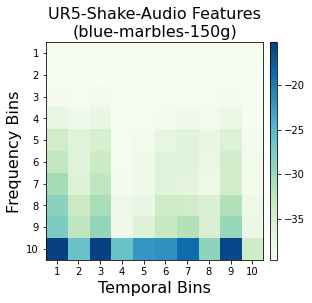

In [6]:
behavior = 'shake'
modality = 'audio'
object_label = 8
trial = 0
save_plot = False
object_name = list(objects_labels.keys())[list(objects_labels.values()).index(object_label)]

print("object_name: ", object_name)
example = robot[behavior][modality][object_label][0][trial]
num_of_features = example.shape[-1]
print("example: ", example.shape)

x_values = 10 # temporal bins
y_values = num_of_features//x_values

print_discretized_data(example, x_values, y_values, robot_name, modality, behavior, object_name, save_plot=save_plot)

object_name:  blue-marbles-150g
example:  (60,)


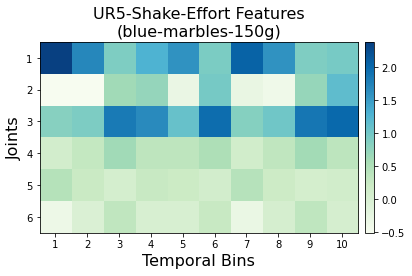

In [7]:
modality = 'effort'

print("object_name: ", object_name)
example = robot[behavior][modality][object_label][0][trial]
num_of_features = example.shape[-1]
print("example: ", example.shape)

y_values = num_of_features//x_values

print_discretized_data(example, x_values, y_values, robot_name, modality, behavior, object_name, save_plot=save_plot)

object_name:  blue-marbles-150g
example:  (30,)


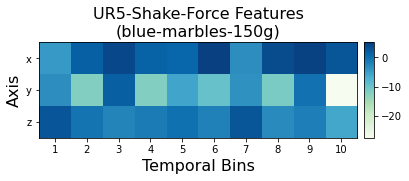

In [8]:
modality = 'force'

print("object_name: ", object_name)
example = robot[behavior][modality][object_label][0][trial]
num_of_features = example.shape[-1]
print("example: ", example.shape)

y_values = num_of_features//x_values

print_discretized_data(example, x_values, y_values, robot_name, modality, behavior, object_name, save_plot=save_plot)